# Network removing all other items than foods

In [1]:
import pandas as pd
import ast
# Load the dataframe from a file
network_df = pd.read_csv('data/df_clean_data.csv',delimiter=";")

# Display the dataframe
network_df

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


product_id                                               name  \
0          18381                                            Bananer   
1          51061                                  Peberfrugter røde   
2          61090                                          Agurk øko   
3          72008                                  Bananer 4 pak øko   
4          18323                                         Gulerødder   
...          ...                                                ...   
9752       31480                          Grønlandske rejer str. XL   
9753       91190      Flødeis m. banan, chokoladestykker og karamel   
9754       85175  Frys-selv-is m. jordbær-, appelsin-, citron- o...   
9755       75592                            Flødeis m. peanutbutter   
9756       71639                                 Halv kylling stegt   

           price                                               link  \
0      2,75/Stk.                            /produkt/bananer/18381/   
1      7,25/Stk.                 /produkt/peberfrugter-roede/51061/   
2      9,00/Stk.            /produkt/salling-oeko-agurk-oeko/61090/   
3      2,20/Stk.                 /produkt/bananer-4-pak-oeko/72008/   
4      10,00/Kg.                /produkt/salling-guleroedder/18323/   
...          ...                                                ...   
9752  279,60/Kg.  /produkt/royal-greenland-groenlandske-rejer-st...   
9753   175,53/L.  /produkt/ben-og-jerrys-floedeis-m-banan-chokol...   
9754   47,16/Kg.  /produkt/easis-frys-selv-is-m-jordbaer-appelsi...   
9755   161,18/L.  /produkt/ben-og-jerrys-floedeis-m-peanutbutter...   
9756   39,80/Kg.             /produkt/xxl-halv-kylling-stegt/71639/   

             category  price_amount  unit outer_category  \
0     frugt-og-groent          2.75  Stk.          Foods   
1     frugt-og-groent          7.25  Stk.          Foods   
2     frugt-og-groent          9.00  Stk.          Foods   
3     frugt-og-groent          2.20  Stk.          Foods   
4     frugt-og-groent         10.00   Kg.          Foods   
...               ...           ...   ...            ...   
9752            frost        279.60   Kg.          Foods   
9753            frost        175.53    L.          Foods   
9754            frost         47.16   Kg.          Foods   
9755            frost        161.18    L.          Foods   
9756            frost         39.80   Kg.          Foods   

                                   neighbor_products_id  \
0     [18379, 18364, 50998, 51061, 53365, 84121, 197...   
1     [18364, 53365, 116664, 18381, 29439, 61090, 18...   
2     [72008, 19687, 37982, 39411, 51061, 41388, 116...   
3     [61090, 19687, 53365, 39411, 18364, 29439, 404...   
4     [18364, 51061, 29439, 18381, 53365, 85465, 841...   
...                                                 ...   
9752  [65011, 41390, 110323, 39244, 20964, 85363, 12...   
9753  [112550, 113706, 91196, 75593, 75592, 127635, ...   
9754  [62067, 89950, 123843, 104708, 89820, 106902, ...   
9755  [91190, 113706, 75584, 75593, 75586, 112550, 6...   
9756  [55532, 98483, 21910, 94545, 105444, 105695, 2...   

                                           descriptions  description_length  
0     bananer har en anelse syrlig, mild og sød smag...                89.0  
1     peberfrugter har en sød og syrlig smag med hin...                88.0  
2     agurker smager mildt, sødt, en anelse syrligt ...                95.0  
3     bananer har en anelse syrlig, mild og sød smag...                89.0  
4     gulerødder har en sød, frugtig, mild og en ane...                70.0  
...                                                 ...                 ...  
9752  disko bay ekstra store kutterrejer fra royal g...                98.0  
9753  oh my! banofee pie! fra ben & jerry’s er en læ...                69.0  
9754  ice pops fra easis er små frys-selv-is uden ti...                50.0  
9755  peanut butter cup fra ben & jerry’s er en crem...                61.0  
9756  stegt 

In [2]:
network_df.shape

(9757, 11)

In [3]:
#make names lowercase
network_df['name'] = network_df['name'].str.lower()
#count instances of names where 'øko' is in the name
network_df['ecology'] = network_df['name'].str.contains('øko')
network_df

product_id                                               name  \
0          18381                                            bananer   
1          51061                                  peberfrugter røde   
2          61090                                          agurk øko   
3          72008                                  bananer 4 pak øko   
4          18323                                         gulerødder   
...          ...                                                ...   
9752       31480                          grønlandske rejer str. xl   
9753       91190      flødeis m. banan, chokoladestykker og karamel   
9754       85175  frys-selv-is m. jordbær-, appelsin-, citron- o...   
9755       75592                            flødeis m. peanutbutter   
9756       71639                                 halv kylling stegt   

           price                                               link  \
0      2,75/Stk.                            /produkt/bananer/18381/   
1      7,25/Stk.                 /produkt/peberfrugter-roede/51061/   
2      9,00/Stk.            /produkt/salling-oeko-agurk-oeko/61090/   
3      2,20/Stk.                 /produkt/bananer-4-pak-oeko/72008/   
4      10,00/Kg.                /produkt/salling-guleroedder/18323/   
...          ...                                                ...   
9752  279,60/Kg.  /produkt/royal-greenland-groenlandske-rejer-st...   
9753   175,53/L.  /produkt/ben-og-jerrys-floedeis-m-banan-chokol...   
9754   47,16/Kg.  /produkt/easis-frys-selv-is-m-jordbaer-appelsi...   
9755   161,18/L.  /produkt/ben-og-jerrys-floedeis-m-peanutbutter...   
9756   39,80/Kg.             /produkt/xxl-halv-kylling-stegt/71639/   

             category  price_amount  unit outer_category  \
0     frugt-og-groent          2.75  Stk.          Foods   
1     frugt-og-groent          7.25  Stk.          Foods   
2     frugt-og-groent          9.00  Stk.          Foods   
3     frugt-og-groent          2.20  Stk.          Foods   
4     frugt-og-groent         10.00   Kg.          Foods   
...               ...           ...   ...            ...   
9752            frost        279.60   Kg.          Foods   
9753            frost        175.53    L.          Foods   
9754            frost         47.16   Kg.          Foods   
9755            frost        161.18    L.          Foods   
9756            frost         39.80   Kg.          Foods   

                                   neighbor_products_id  \
0     [18379, 18364, 50998, 51061, 53365, 84121, 197...   
1     [18364, 53365, 116664, 18381, 29439, 61090, 18...   
2     [72008, 19687, 37982, 39411, 51061, 41388, 116...   
3     [61090, 19687, 53365, 39411, 18364, 29439, 404...   
4     [18364, 51061, 29439, 18381, 53365, 85465, 841...   
...                                                 ...   
9752  [65011, 41390, 110323, 39244, 20964, 85363, 12...   
9753  [112550, 113706, 91196, 75593, 75592, 127635, ...   
9754  [62067, 89950, 123843, 104708, 89820, 106902, ...   
9755  [91190, 113706, 75584, 75593, 75586, 112550, 6...   
9756  [55532, 98483, 21910, 94545, 105444, 105695, 2...   

                                           descriptions  description_length  \
0     bananer har en anelse syrlig, mild og sød smag...                89.0   
1     peberfrugter har en sød og syrlig smag med hin...                88.0   
2     agurker smager mildt, sødt, en anelse syrligt ...                95.0   
3     bananer har en anelse syrlig, mild og sød smag...                89.0   
4     gulerødder har en sød, frugtig, mild og en ane...                70.0   
...                                                 ...                 ...   
9752  disko bay ekstra store kutterrejer fra royal g...                98.0   
9753  oh my! banofee pie! fra ben & jerry’s er en læ...                69.0   
9754  ice pops fra easis er små frys-selv-is uden ti...                50.0   
9755  peanut butter cup fra ben & jerry’s er en crem...                61.0   
9

In [4]:
#unpack the list of neighbors using ast.literal_eval
network_df['neighbor_products_id'] = network_df['neighbor_products_id'].apply(ast.literal_eval)

#### This is where we remove

In [5]:
#remove all the neighbor_products_ids that are not in Foods category 
network_df["neighbor_products_id"] = network_df["neighbor_products_id"].apply(lambda x: [p_id for p_id in x if p_id in network_df["product_id"].values])


In [6]:

counter = 0
for i in range(len(network_df["neighbor_products_id"])):#[0]#.value_counts().head(10)
    counter += 10-len(network_df["neighbor_products_id"][i])
print(f"The initial number of neighbor products with duplicates was {network_df.shape[0]*10}")
print(f"The total amount of neighbor products that was removed from neighbor products is {counter}")


The initial number of neighbor products with duplicates was 97570
The total amount of neighbor products that was removed from neighbor products is 6126


In [7]:
#make a list of all the pairs of the items
def find_pairs(my_list):
    pairs = []
    for n,item1 in enumerate(my_list):
        print(n, item1)
        for item2 in my_list[n+1:]:
            pairs.append((item1,item2))
    return pairs

pairs = network_df["neighbor_products_id"].apply(lambda x: sorted(x)).apply(find_pairs)


0 18364
1 18379
2 19721
3 29439
4 41701
5 50998
6 51061
7 53365
8 84121
9 116664
0 18323
1 18359
2 18364
3 18381
4 18518
5 29439
6 53365
7 61090
8 72008
9 116664
0 19676
1 19687
2 37982
3 39411
4 41388
5 51061
6 69482
7 72008
8 73358
9 116664
0 18364
1 19676
2 19687
3 29439
4 37982
5 39411
6 40446
7 53365
8 61090
9 84669
0 18330
1 18364
2 18381
3 29439
4 41688
5 51061
6 53365
7 84121
8 84122
9 85465
0 18323
1 18364
2 18381
3 29439
4 51061
5 53366
6 61090
7 72008
8 84121
0 18364
1 18381
2 29439
3 40626
4 41685
5 51061
6 53365
7 79706
8 84122
9 116664
0 18323
1 18330
2 18364
3 18379
4 18381
5 26413
6 40810
7 41701
8 84121
9 116664
0 18364
1 18379
2 18381
3 18518
4 29439
5 41685
6 41701
7 51061
8 53365
9 61090
0 18364
1 18379
2 18381
3 19687
4 29439
5 51061
6 53365
7 61090
8 72008
9 116664
0 18323
1 18364
2 18381
3 40810
4 41701
5 50998
6 51061
7 53365
8 84121
9 116664
0 18305
1 18323
2 18364
3 18518
4 19643
5 29439
6 51061
7 53365
8 84120
9 84121
0 18330
1 18364
2 29439
3 41701
4 41800
5

In [8]:
pairs[0]

[(18364, 18379),
 (18364, 19721),
 (18364, 29439),
 (18364, 41701),
 (18364, 50998),
 (18364, 51061),
 (18364, 53365),
 (18364, 84121),
 (18364, 116664),
 (18379, 19721),
 (18379, 29439),
 (18379, 41701),
 (18379, 50998),
 (18379, 51061),
 (18379, 53365),
 (18379, 84121),
 (18379, 116664),
 (19721, 29439),
 (19721, 41701),
 (19721, 50998),
 (19721, 51061),
 (19721, 53365),
 (19721, 84121),
 (19721, 116664),
 (29439, 41701),
 (29439, 50998),
 (29439, 51061),
 (29439, 53365),
 (29439, 84121),
 (29439, 116664),
 (41701, 50998),
 (41701, 51061),
 (41701, 53365),
 (41701, 84121),
 (41701, 116664),
 (50998, 51061),
 (50998, 53365),
 (50998, 84121),
 (50998, 116664),
 (51061, 53365),
 (51061, 84121),
 (51061, 116664),
 (53365, 84121),
 (53365, 116664),
 (84121, 116664)]

In [9]:
len(pairs[0])

45

In [10]:
all_pairs = pairs.explode()
print(f"The amount of pairs with duplicates found is {len(all_pairs)}")

The amount of pairs with duplicates found is 387394


In [11]:
all_pairs.groupby(all_pairs).count().sort_values()

# Group by the pairs of author_ids, count occurrences, and sort by values
pair_counts = all_pairs.groupby(all_pairs).count().sort_values()

# Extract pairs (as index) and counts (as values)
pairs = pair_counts.index
counts = pair_counts.values

# Store pairs and counts as tuples in a list
Weighted_edge_list = [(item[0], item[1], count) for item, count in zip(pairs, counts)]
Weighted_edge_list

[(14535, 14538, 1),
 (69594, 116357, 1),
 (69594, 116377, 1),
 (69594, 117055, 1),
 (69594, 118832, 1),
 (69594, 120698, 1),
 (69594, 120812, 1),
 (69594, 126120, 1),
 (69594, 127334, 1),
 (69643, 69909, 1),
 (69643, 72487, 1),
 (69643, 77479, 1),
 (69643, 79486, 1),
 (69643, 79964, 1),
 (69643, 80572, 1),
 (69643, 81497, 1),
 (69643, 81527, 1),
 (69643, 82383, 1),
 (69643, 85043, 1),
 (69643, 89582, 1),
 (69643, 93852, 1),
 (69643, 103716, 1),
 (69643, 107263, 1),
 (69643, 107458, 1),
 (69643, 109410, 1),
 (69643, 109421, 1),
 (69643, 110217, 1),
 (69643, 110698, 1),
 (69594, 113823, 1),
 (69594, 112499, 1),
 (69594, 112498, 1),
 (69594, 111789, 1),
 (69594, 83806, 1),
 (69594, 83809, 1),
 (69594, 83836, 1),
 (69594, 83900, 1),
 (69594, 85041, 1),
 (69594, 85297, 1),
 (69594, 85386, 1),
 (69594, 86663, 1),
 (69594, 89601, 1),
 (69594, 89810, 1),
 (69594, 90046, 1),
 (69594, 91403, 1),
 (69594, 91434, 1),
 (69643, 110895, 1),
 (69594, 91444, 1),
 (69594, 92019, 1),
 (69594, 92904, 1),


In [12]:
print(f"The amount of pairs without duplicates is {len(Weighted_edge_list)}")

The amount of pairs without duplicates is 286791


In [13]:
Weighted_edge_list[0]

(14535, 14538, 1)

In [14]:
#count the amount of pairs that appears more than once in the weighted edge list ie. the (id,id,amount) by indexing the last element of the tuple
sum([1 for edge in Weighted_edge_list if edge[2] > 10])


698

In [15]:
import networkx as nx
# Create an empty undirected graph
G = nx.Graph()

# Add weighted edges from the result list
G.add_weighted_edges_from(Weighted_edge_list)

G.nodes.data()

NodeDataView({14535: {}, 14538: {}, 69594: {}, 116357: {}, 116377: {}, 117055: {}, 118832: {}, 120698: {}, 120812: {}, 126120: {}, 127334: {}, 69643: {}, 69909: {}, 72487: {}, 77479: {}, 79486: {}, 79964: {}, 80572: {}, 81497: {}, 81527: {}, 82383: {}, 85043: {}, 89582: {}, 93852: {}, 103716: {}, 107263: {}, 107458: {}, 109410: {}, 109421: {}, 110217: {}, 110698: {}, 113823: {}, 112499: {}, 112498: {}, 111789: {}, 83806: {}, 83809: {}, 83836: {}, 83900: {}, 85041: {}, 85297: {}, 85386: {}, 86663: {}, 89601: {}, 89810: {}, 90046: {}, 91403: {}, 91434: {}, 110895: {}, 91444: {}, 92019: {}, 92904: {}, 93921: {}, 97120: {}, 104446: {}, 104448: {}, 104673: {}, 105185: {}, 108194: {}, 108267: {}, 109996: {}, 110001: {}, 110377: {}, 91472: {}, 111011: {}, 111015: {}, 112616: {}, 69663: {}, 89621: {}, 89690: {}, 91894: {}, 92298: {}, 104443: {}, 104444: {}, 105446: {}, 105709: {}, 106820: {}, 107027: {}, 107029: {}, 107643: {}, 108704: {}, 89533: {}, 110123: {}, 110142: {}, 111026: {}, 112490:

In [40]:
#add the product names to the nodes
for node in G.nodes:
    G.nodes[node]["name"] = str(network_df[network_df["product_id"] == node]["name"].values[0])
    G.nodes[node]["category"] = str(network_df[network_df["product_id"] == node]["category"].values[0])
    G.nodes[node]["price_amount"] = network_df[network_df["product_id"] == node]["price_amount"].values[0]
    G.nodes[node]["unit"] = str(network_df[network_df["product_id"] == node]["unit"].values[0])
    G.nodes[node]["ecology"] = str(network_df[network_df["product_id"] == node]["ecology"].values[0])


In [35]:
G.nodes.data()

NodeDataView({14535: {'name': 'koffeinfri instant kaffe', 'category': 'kolonial', 'price_amount': 375, 'unit': 'Kg.', 'ecology': 'False'}, 14538: {'name': 'instant kaffe', 'category': 'kolonial', 'price_amount': 375, 'unit': 'Kg.', 'ecology': 'False'}, 69594: {'name': 'mucho mas', 'category': 'drikkevarer', 'price_amount': 46, 'unit': 'L.', 'ecology': 'False'}, 116357: {'name': 'danbo skæreost lagret 45+', 'category': 'mejeri-og-koel', 'price_amount': 109, 'unit': 'Kg.', 'ecology': 'False'}, 116377: {'name': 'brie 60+', 'category': 'mejeri-og-koel', 'price_amount': 127, 'unit': 'Kg.', 'ecology': 'False'}, 117055: {'name': 'colaflasker sukkerfri', 'category': 'slik-og-snacks', 'price_amount': 161, 'unit': 'Kg.', 'ecology': 'False'}, 118832: {'name': 'panerede fiskefileter', 'category': 'frost', 'price_amount': 59, 'unit': 'Kg.', 'ecology': 'False'}, 120698: {'name': 'mandeldrik øko', 'category': 'mejeri-og-koel', 'price_amount': 25, 'unit': 'L.', 'ecology': 'True'}, 120812: {'name': 'an

In [36]:
print(f"The number of nodes in the graph is {G.number_of_nodes()}")
print(f"The number of edges in the graph is {G.number_of_edges()}")
print(f"The number of connected components in the graph is {nx.number_connected_components(G)}")
print(f"The density of the graph is {nx.density(G)}")
print(f"The graph is connected: {nx.is_connected(G)}")

The number of nodes in the graph is 9324
The number of edges in the graph is 286791
The number of connected components in the graph is 1
The density of the graph is 0.006598383676577391
The graph is connected: True


#### Save the network as a Json

In [43]:
import json
from networkx.readwrite import json_graph
import numpy as np

graph_dict = nx.node_link_data(G)

#json_graph.node_link_data(G)
# Convert int64 types to native Python types
def convert(o):
    if isinstance(o, np.int64):
        return int(o)
    raise TypeError

# Write the graph dictionary to a JSON file
with open("data/network_with_attributes.json", "w") as f:
    json.dump(graph_dict, f, default=convert,indent=4)


# Graph Analysis

## Degree distribution

In [19]:
G_degrees = [degree for node, degree in G.degree()]   

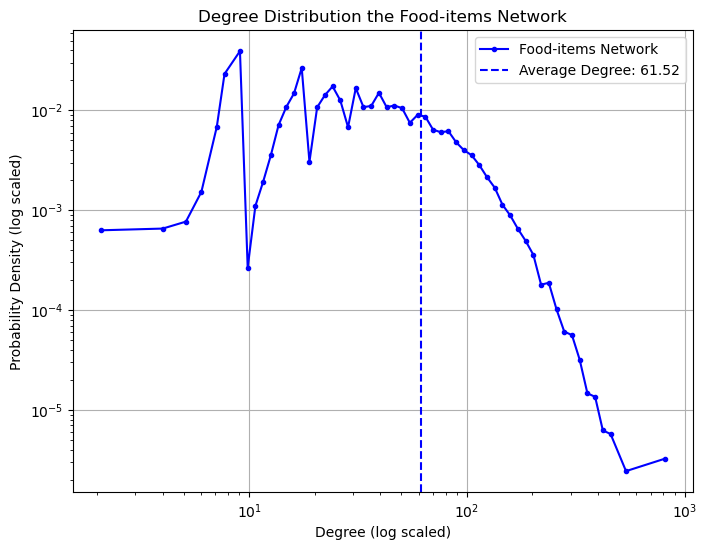

In [206]:
import matplotlib.pyplot as plt
import numpy as np

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Define bins using logspace for logarithmic scaling
bins_css = np.logspace(np.log10(min(G_degrees)), np.log10(max(G_degrees)), 75)

# Plot the degree distribution of the Computational Social Scientists network
hist_css, edges_css = np.histogram(G_degrees, bins=bins_css, density=True)
x_css = (edges_css[1:] + edges_css[:-1]) / 2

# Filter empty bins
xx_css, yy_css = zip(*[(i, j) for (i, j) in zip(x_css, hist_css) if j > 0])

# Plot them
ax.plot(xx_css, yy_css, marker='.', label='Food-items Network', color='b')


# Calculate average degree for both networks
avg_degree_css = np.mean(G_degrees)

# Add vertical lines for average degrees
ax.axvline(avg_degree_css, color='b', linestyle='--', label=f'Average Degree: {avg_degree_css:.2f}')


# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('Degree (log scaled)')
ax.set_ylabel('Probability Density (log scaled)')
ax.set_title('Degree Distribution the Food-items Network')
ax.legend()

# Show grid
ax.grid(True) 

# Show the plot
plt.show()


Text(0.5, 1.0, 'Foods-network')

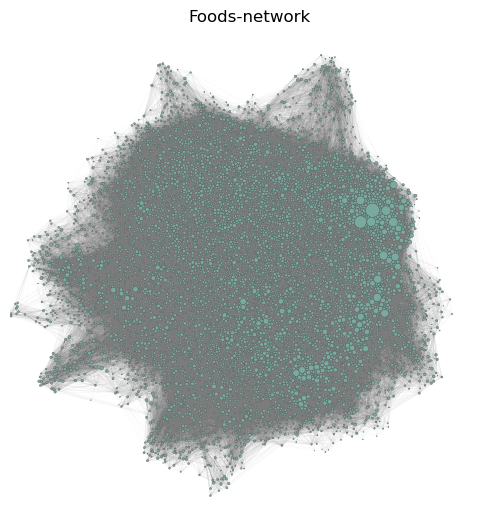

In [44]:
import netwulf as nw
network, config = nw.visualize(G, plot_in_cell_below=False)
fig, ax = nw.draw_netwulf(network)
ax.set_title('Foods-network')

In [164]:
network_df[network_df["product_id"]==18364]

product_id   name      price                           link  \
268       18364  Agurk  7,00/Stk.  /produkt/salling-agurk/18364/   

            category  price_amount  unit outer_category  \
268  frugt-og-groent           7.0  Stk.          Foods   

                                  neighbor_products_id  \
268  [51061, 18518, 18381, 116664, 84121, 53365, 72...   

                                          descriptions  description_length  
268  agurker smager mildt, sødt og en anelse syrlig...                94.0

In [166]:
network_df[network_df["product_id"]==29439]

product_id   name      price                                      link  \
40       29439  Agurk  7,00/Stk.  /produkt/danske-groentsager-agurk/29439/   

           category  price_amount  unit outer_category  \
40  frugt-og-groent           7.0  Stk.          Foods   

                                 neighbor_products_id  \
40  [41701, 51061, 41688, 116664, 18323, 85325, 18...   

                                         descriptions  description_length  
40  agurker smager mildt, sødt og en anelse syrlig...                94.0

In [167]:
network_df[network_df["product_id"]==116664]

product_id                  name      price  \
8      116664  Cherry blommetomater  44,44/Kg.   

                                    link         category  price_amount unit  \
8  /produkt/cherry-blommetomater/116664/  frugt-og-groent         44.44  Kg.   

  outer_category                               neighbor_products_id  \
8          Foods  [18364, 51061, 53365, 29439, 61090, 18518, 417...   

                                        descriptions  description_length  
8  cherry blommetomater er små, røde og aflange t...                75.0

# Network including all items in the neigbors list Also House and Other categories

If only looking at the foods category we have 9324 nodes, with other categories there are 10970 nodes

In [147]:
df_all = pd.read_csv('data/df_Salling_Products_ALL_outer_categories.csv',delimiter=";")
#remove all nan values
df_all = df_all.dropna()
df_all

Unnamed: 0  product_id  \
0               0       18381   
1               1       51061   
2               2       61090   
3               3       72008   
4               4       18323   
...           ...         ...   
32280       32280       88614   
32281       32281      130754   
32282       32282      127283   
32283       32283      117626   
32284       32284      100571   

                                                    name        price  \
0                                                Bananer    2,75/Stk.   
1                                      Peberfrugter røde    7,25/Stk.   
2                                              Agurk øko    9,00/Stk.   
3                                      Bananer 4 pak øko    2,20/Stk.   
4                                             Gulerødder    10,00/Kg.   
...                                                  ...          ...   
32280  Tendens køkken- og badmaling silkeblank 25 2,2...    166,67/L.   
32281       Hansgrohe Vernis blend hb 100 vario ecosmart  199,00/Stk.   
32282  Hansgrohe sampak hb 100 Vario Ecos Metaflex bs...  319,00/Stk.   
32283                      Trappestige - sammenklappelig  295,00/Stk.   
32284                          Grouw havesprøjte 5 liter   85,00/Stk.   

                                                    link         category  \
0                                /produkt/bananer/18381/  frugt-og-groent   
1                     /produkt/peberfrugter-roede/51061/  frugt-og-groent   
2                /produkt/salling-oeko-agurk-oeko/61090/  frugt-og-groent   
3                     /produkt/bananer-4-pak-oeko/72008/  frugt-og-groent   
4                    /produkt/salling-guleroedder/18323/  frugt-og-groent   
...                                                  ...              ...   
32280  /produkt/tendens-tendens-koekken-og-badmaling-...      byggemarked   
32281  /produkt/hansgrohe-hansgrohe-vernis-blend-hb-1...      byggemarked   
32282  /produkt/hansgrohe-hansgrohe-sampak-hb-100-var...      byggemarked   
32283       /produkt/trappestige-sammenklappelig/117626/      byggemarked   
32284  /produkt/grouw-grouw-havesproejte-5-liter/100571/      byggemarked   

       price_amount  unit outer_category  
0              2.75  Stk.          Foods  
1              7.25  Stk.          Foods  
2              9.00  Stk.          Foods  
3              2.20  Stk.          Foods  
4             10.00   Kg.          Foods  
...             ...   ...            ...  
32280        166.67    L.          House  
32281        199.00  Stk.          House  
32282        319.00  Stk.          House  
32283        295.00  Stk.          House  
32284         85.00  Stk.          House  

[32277 rows x 9 columns]

In [148]:
import pandas as pd
import ast
# Load the dataframe from a file
network_df = pd.read_csv('data/df_clean_data.csv',delimiter=";")
network_df['neighbor_products_id'] = network_df['neighbor_products_id'].apply(ast.literal_eval)


In [149]:
#remove all the neighbor_products_ids that are not collected in the df_all 
network_df["neighbor_products_id"] = network_df["neighbor_products_id"].apply(lambda x: [p_id for p_id in x if p_id in df_all["product_id"].values])


In [150]:

def find_pairs(my_list):
    pairs = []
    for n,item1 in enumerate(my_list):
        print(n, item1)
        for item2 in my_list[n+1:]:
            pairs.append((item1,item2))
    return pairs

pairs = network_df["neighbor_products_id"].apply(lambda x: sorted(x)).apply(find_pairs)

0 18364
1 18379
2 19721
3 29439
4 41701
5 50998
6 51061
7 53365
8 84121
9 116664
0 18323
1 18359
2 18364
3 18381
4 18518
5 29439
6 53365
7 61090
8 72008
9 116664
0 19676
1 19687
2 37982
3 39411
4 41388
5 51061
6 69482
7 72008
8 73358
9 116664
0 18364
1 19676
2 19687
3 29439
4 37982
5 39411
6 40446
7 53365
8 61090
9 84669
0 18330
1 18364
2 18381
3 29439
4 41688
5 51061
6 53365
7 84121
8 84122
9 85465
0 18323
1 18364
2 18381
3 29439
4 51061
5 53366
6 61090
7 72008
8 83545
9 84121
0 18364
1 18381
2 29439
3 40626
4 41685
5 51061
6 53365
7 79706
8 84122
9 116664
0 18323
1 18330
2 18364
3 18379
4 18381
5 26413
6 40810
7 41701
8 84121
9 116664
0 18364
1 18379
2 18381
3 18518
4 29439
5 41685
6 41701
7 51061
8 53365
9 61090
0 18364
1 18379
2 18381
3 19687
4 29439
5 51061
6 53365
7 61090
8 72008
9 116664
0 18323
1 18364
2 18381
3 40810
4 41701
5 50998
6 51061
7 53365
8 84121
9 116664
0 18305
1 18323
2 18364
3 18518
4 19643
5 29439
6 51061
7 53365
8 84120
9 84121
0 18330
1 18364
2 29439
3 41701
4

In [151]:
all_pairs = pairs.explode()
print(f"The amount of pairs with duplicates found is {len(all_pairs)}")

The amount of pairs with duplicates found is 435399


In [152]:
all_pairs.groupby(all_pairs).count().sort_values()

# Group by the pairs of author_ids, count occurrences, and sort by values
pair_counts = all_pairs.groupby(all_pairs).count().sort_values()

# Extract pairs (as index) and counts (as values)
pairs = pair_counts.index
counts = pair_counts.values

# Store pairs and counts as tuples in a list
Weighted_edge_list = [(item[0], item[1], count) for item, count in zip(pairs, counts)]
Weighted_edge_list

[(14287, 16216, 1),
 (70476, 120990, 1),
 (70476, 118867, 1),
 (70476, 110414, 1),
 (70476, 109283, 1),
 (70476, 87442, 1),
 (70476, 81833, 1),
 (70476, 124341, 1),
 (70476, 79277, 1),
 (70476, 73557, 1),
 (70454, 127644, 1),
 (70454, 125894, 1),
 (70454, 125808, 1),
 (70454, 123023, 1),
 (70454, 121677, 1),
 (70476, 73911, 1),
 (70454, 120996, 1),
 (70476, 129770, 1),
 (70478, 82214, 1),
 (70480, 87992, 1),
 (70480, 85921, 1),
 (70480, 81567, 1),
 (70480, 79942, 1),
 (70480, 73894, 1),
 (70480, 71474, 1),
 (70478, 73824, 1),
 (70478, 113988, 1),
 (70478, 110315, 1),
 (70478, 106680, 1),
 (70478, 104483, 1),
 (70478, 99601, 1),
 (70478, 93067, 1),
 (70478, 85785, 1),
 (70478, 110347, 1),
 (70454, 120549, 1),
 (70454, 117013, 1),
 (70454, 116989, 1),
 (70454, 93833, 1),
 (70454, 93825, 1),
 (70454, 92967, 1),
 (70454, 92944, 1),
 (70454, 91257, 1),
 (70454, 90577, 1),
 (70454, 94574, 1),
 (70454, 90023, 1),
 (70454, 87866, 1),
 (70454, 87401, 1),
 (70454, 86862, 1),
 (70454, 85965, 1),


In [153]:
import networkx as nx
# Create an empty undirected graph
G_all = nx.Graph()

# Add weighted edges from the result list
G_all.add_weighted_edges_from(Weighted_edge_list)

G_all.nodes.data()

NodeDataView({14287: {}, 16216: {}, 70476: {}, 120990: {}, 118867: {}, 110414: {}, 109283: {}, 87442: {}, 81833: {}, 124341: {}, 79277: {}, 73557: {}, 70454: {}, 127644: {}, 125894: {}, 125808: {}, 123023: {}, 121677: {}, 73911: {}, 120996: {}, 129770: {}, 70478: {}, 82214: {}, 70480: {}, 87992: {}, 85921: {}, 81567: {}, 79942: {}, 73894: {}, 71474: {}, 73824: {}, 113988: {}, 110315: {}, 106680: {}, 104483: {}, 99601: {}, 93067: {}, 85785: {}, 110347: {}, 120549: {}, 117013: {}, 116989: {}, 93833: {}, 93825: {}, 92967: {}, 92944: {}, 91257: {}, 90577: {}, 94574: {}, 90023: {}, 87866: {}, 87401: {}, 86862: {}, 85965: {}, 83333: {}, 82117: {}, 89199: {}, 100837: {}, 102968: {}, 104447: {}, 116894: {}, 116847: {}, 116682: {}, 115343: {}, 114657: {}, 112533: {}, 110692: {}, 110511: {}, 108936: {}, 108472: {}, 107244: {}, 106822: {}, 106767: {}, 105738: {}, 104692: {}, 89691: {}, 81972: {}, 89924: {}, 70482: {}, 101633: {}, 97234: {}, 93869: {}, 93837: {}, 93829: {}, 93646: {}, 105448: {}, 

In [154]:
#add the product names to the nodes
id_not_in_df = []
for node in G_all.nodes:
    if node in df_all["product_id"].values:
        G_all.nodes[node]["name"] = df_all[df_all["product_id"] == node]["name"].values[0]
        G_all.nodes[node]["category"] = df_all[df_all["product_id"] == node]["category"].values[0]
        G_all.nodes[node]["outer_category"] = df_all[df_all["product_id"] == node]["outer_category"].values[0]
        G_all.nodes[node]["price_amount"] = df_all[df_all["product_id"] == node]["price_amount"].values[0]
        G_all.nodes[node]["unit"] = df_all[df_all["product_id"] == node]["unit"].values[0]
    else:
        id_not_in_df.append(node)
        print(f"Product ID {node} does not exist in the DataFrame.")


In [155]:
G_all.nodes.data()

NodeDataView({14287: {'name': 'Urtehø', 'category': 'dyremad', 'outer_category': 'Other', 'price_amount': 83.9, 'unit': 'Kg.'}, 16216: {'name': 'Lakridspastiller m. granatæblesmag u. tilsat sukker', 'category': 'slik-og-snacks', 'outer_category': 'Foods', 'price_amount': 445.65, 'unit': 'Kg.'}, 70476: {'name': 'Ristretto Barista Kaffekapsler', 'category': 'kolonial', 'outer_category': 'Foods', 'price_amount': 2.81, 'unit': 'Stk.'}, 120990: {'name': 'Iskaffe Caffé Latte laktosefri', 'category': 'mejeri-og-koel', 'outer_category': 'Foods', 'price_amount': 54.39, 'unit': 'L.'}, 118867: {'name': 'Rosé', 'category': 'drikkevarer', 'outer_category': 'Foods', 'price_amount': 105.33, 'unit': 'L.'}, 110414: {'name': 'Americano kaffekapsler øko', 'category': 'kolonial', 'outer_category': 'Foods', 'price_amount': 2.31, 'unit': 'Stk.'}, 109283: {'name': 'Pasta m. spinat og ricotta', 'category': 'frost', 'outer_category': 'Foods', 'price_amount': 88.78, 'unit': 'Kg.'}, 87442: {'name': 'Americano Ka

In [160]:
print(f"The number of nodes in the graph is {G_all.number_of_nodes()}")
print(f"The number of edges in the graph is {G_all.number_of_edges()}")
print(f"The number of connected components in the graph is {nx.number_connected_components(G_all)}")
print(f"The density of the graph is {nx.density(G_all)}")
print(f"The graph is connected: {nx.is_connected(G_all)}")

The number of nodes in the graph is 10970
The number of edges in the graph is 328923
The number of connected components in the graph is 1
The density of the graph is 0.005467018887154676
The graph is connected: True


### Degree distribution

In [156]:
G_all_degrees = [degree for node, degree in G_all.degree()]   

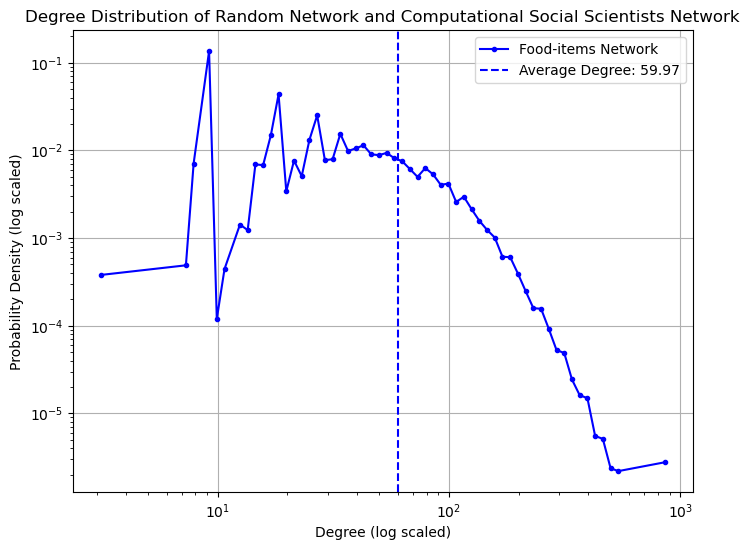

In [158]:
import matplotlib.pyplot as plt
import numpy as np

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Define bins using logspace for logarithmic scaling
bins_css = np.logspace(np.log10(min(G_all_degrees)), np.log10(max(G_all_degrees)), 75)

# Plot the degree distribution of the Computational Social Scientists network
hist_css, edges_css = np.histogram(G_all_degrees, bins=bins_css, density=True)
x_css = (edges_css[1:] + edges_css[:-1]) / 2

# Filter empty bins
xx_css, yy_css = zip(*[(i, j) for (i, j) in zip(x_css, hist_css) if j > 0])

# Plot them
ax.plot(xx_css, yy_css, marker='.', label='Food-items Network', color='b')


# Calculate average degree for both networks
avg_degree_css = np.mean(G_all_degrees)

# Add vertical lines for average degrees
ax.axvline(avg_degree_css, color='b', linestyle='--', label=f'Average Degree: {avg_degree_css:.2f}')


# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('Degree (log scaled)')
ax.set_ylabel('Probability Density (log scaled)')
ax.set_title('Degree Distribution of Random Network and Computational Social Scientists Network')
ax.legend()

# Show grid
ax.grid(True) 

# Show the plot
plt.show()


Text(0.5, 1.0, 'Foods-network')

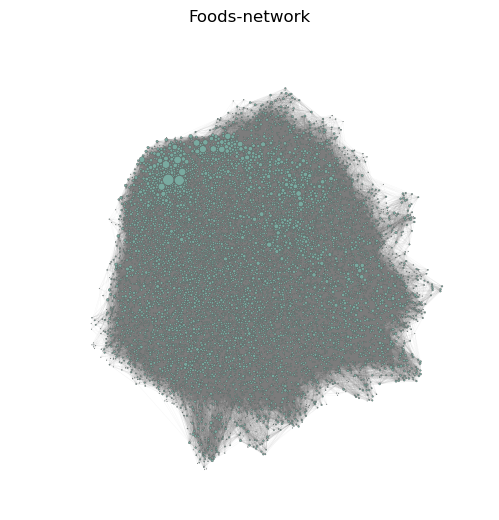

In [168]:
import netwulf as nw
network, config = nw.visualize(G_all, plot_in_cell_below=False)
fig, ax = nw.draw_netwulf(network)
ax.set_title('Foods-network')